In [11]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.colors as mcol

%matplotlib inline

In [12]:
exp = np.array([
        [300.0, 100.0, 0.2041],
[500.0, 100.0, 0.1577],
[700.0, 100.0, 0.1938],
[1000.0, 100.0, 0.2354],
[1500.0, 100.0, 0.2744],
[2000.0, 100.0, 0.502],
[3000.0, 100.0, 2.7422],
[300.0, 200.0, 6.6563],
[500.0, 200.0, 0.4824],
[700.0, 200.0, 0.2803],
[1000.0, 200.0, 0.3174],
[1500.0, 200.0, 0.4004],
[2000.0, 200.0, 0.5957],
[3000.0, 200.0, 3.0859],
[300.0, 300.0, 9.4063],
[500.0, 300.0, 14.0625],
[700.0, 300.0, 0.9336],
[1000.0, 300.0, 0.4707],
[1500.0, 300.0, 0.6035],
[2000.0, 300.0, 0.8008],
[3000.0, 300.0, 3.3906],
[300.0, 500.0, 18.1875],
[500.0, 500.0, 40.375],
[700.0, 500.0, 55.75],
[1000.0, 500.0, 17.4375],
[1500.0, 500.0, 1.3867],
[2000.0, 500.0, 1.8359],
[3000.0, 500.0, 4.9219]
    ]
)

In [13]:
def interp(data, method='linear'):
    x = data[:,0]
    y = data[:,1]
    z = data[:,2]
    
    xi = np.linspace(x.min(), x.max(), 1000)
    yi = np.linspace(y.min(), y.max(), 1000)
    zi = mlab.griddata(x, y, z, xi, yi, interp=method)
    
    return xi, yi, zi

In [14]:
def interp2(data, method='linear'):
    x = data[:,0]
    y = data[:,1]
    z = data[:,2]
    
    xi = np.linspace(x.min(), x.max(), 1000)
    yi = np.linspace(y.min(), y.max(), 1000)
    xi, yi = np.meshgrid(xi,yi)
    zi = interpolate.griddata((x, y), z, (xi, yi), method=method)
    
    return xi, yi, zi

In [15]:
def interp3(data, method='linear'):
    x = data[:,0]
    y = data[:,1]
    z = data[:,2]
    
    xi = np.linspace(x.min(), x.max(), 1000)
    yi = np.linspace(y.min(), y.max(), 1000)
    xi, yi = np.meshgrid(xi,yi)
    zi = interpolate.LinearNDInterpolator(x, y, z, method=method)(xi, yi)
    
    return xi, yi, zi

In [16]:
stops = [0.0000, 0.1250, 0.2500, 0.3750, 0.5000, 0.6250, 0.7500, 0.8750, 1.0000]
red   = [0.2082, 0.0592, 0.0780, 0.0232, 0.1802, 0.5301, 0.8186, 0.9956, 0.9764]
green = [0.1664, 0.3599, 0.5041, 0.6419, 0.7178, 0.7492, 0.7328, 0.7862, 0.9832]
blue  = [0.5293, 0.8684, 0.8385, 0.7914, 0.6425, 0.4662, 0.3499, 0.1968, 0.0539]

ered = []
egreen = []
eblue = []
for i, stop in enumerate(stops):
    if i is 0:
        ered.append( (stop, 0., red[i]) )
        egreen.append( (stop, 0., green[i]) )
        eblue.append( (stop, 0., blue[i]) )
    elif i is len(stops)-1:
        ered.append( (stop, red[i], 1.) )
        egreen.append( (stop, green[i], 1.) )
        eblue.append( (stop, blue[i], 1.) )
    else:
        ered.append( (stop, red[i], red[i]) )
        egreen.append( (stop, green[i], green[i]) )
        eblue.append( (stop, blue[i], blue[i]) )
cdict = {'red': ered, 'green': egreen, 'blue': eblue}

bird = mcol.LinearSegmentedColormap('bird', cdict)

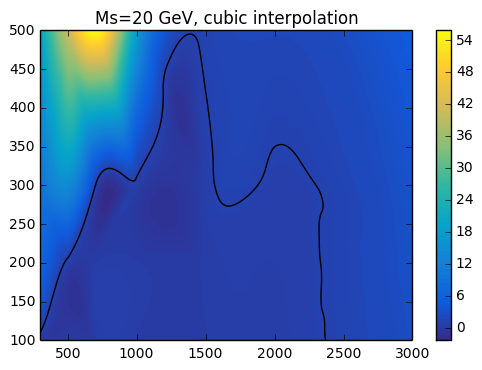

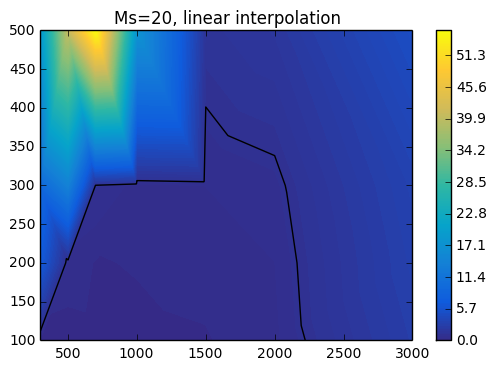

In [17]:
xi, yi, zi = interp2(exp, 'cubic')
plt.contour(xi, yi, zi, [1.0], colors='k')
plt.contourf(xi, yi, zi, 200, cmap=bird)
plt.colorbar()


plt.title('Ms=20 GeV, cubic interpolation')
plt.show()

xi, yi, zi = interp2(exp, 'linear')
plt.contour(xi, yi, zi, [1.0], colors='k')
plt.contourf(xi, yi, zi, 200, cmap=bird)
plt.colorbar()

plt.title('Ms=20, linear interpolation')
plt.show()
